**<font size= 7>Questions we want to explore:</font>**

~1. How many jobs are currently available on the Indian market?~

~2. How many jobs are available in the data domain?~

~3. Which job roles have the highest demand?~

<font size= 6>4. Which are the most in-demand skills for the Indian market?</font>

<sup><sub>5. Which jobs are the highest paid in India?</sup></sub>

<sup><sub>6. Top 10 companies in India?</sup></sub>

<sup><sub>7. How many jobs have remote opportunities?</sup></sub>

<sup><sub>8. What are the types of skills in demand?</sup></sub>

<sup><sub>9. Which platform has more data roles posted?</sup></sub>

<sup><sub>10. Top 10 companies providing health insurance?</sup></sub>



In [19]:
!pip install datasets
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_india = df[df['job_country'] == 'India'].copy()
df_india_data = df_india[df_india['job_title_short'].str.contains('Data', na= False, case= False)]

df_india_data.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
583113,Data Engineer,Sr Data Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-08-16 09:51:39,False,False,India,None,NaN,NaN,GE Power,"[sql, tableau, sap, flow]","{'analyst_tools': ['tableau', 'sap'], 'other':..."
568669,Data Engineer,Data Engineer,"Hyderabad, Telangana, India",via BeBee India,Full-time,False,India,2023-01-14 09:12:49,True,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,"[sql, python, sql server, databricks, azure, a...","{'cloud': ['databricks', 'azure'], 'databases'..."
584341,Data Scientist,Data Scientist- Madhya Pradesh,"Indore, Madhya Pradesh, India",via LinkedIn,Full-time,False,India,2023-11-16 09:10:58,False,False,India,None,NaN,NaN,THE FASHION COSMO,None,None
684773,Senior Data Engineer,Senior Data Engineer,"Bengaluru, Karnataka, India",via Indeed,Full-time,False,India,2023-06-16 10:48:30,False,False,India,None,NaN,NaN,DataArt,"[sql, java, aws, azure, spark]","{'cloud': ['aws', 'azure'], 'libraries': ['spa..."
93614,Data Engineer,"Big Data Engineer, Data Reliability Engineering","Bengaluru, Karnataka, India",via Women For Hire Jobs,Full-time,False,India,2023-08-01 00:36:10,True,False,India,None,NaN,NaN,Wayfair,"[python, sql, firestore, gcp, aws, kafka, airf...","{'cloud': ['gcp', 'aws'], 'databases': ['fires..."


In [20]:
df_india_data_exploded = df_india_data.explode('job_skills')
df_india_data_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785697,Data Scientist,Data Science Python modelling,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:27,False,False,India,None,NaN,NaN,Live Connections,jira,"{'analyst_tools': ['power bi', 'tableau', 'wor..."
785697,Data Scientist,Data Science Python modelling,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:27,False,False,India,None,NaN,NaN,Live Connections,confluence,"{'analyst_tools': ['power bi', 'tableau', 'wor..."
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,excel,"{'analyst_tools': ['excel'], 'other': ['flow']}"
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,flow,"{'analyst_tools': ['excel'], 'other': ['flow']}"


In [21]:
df_india_data_skills = df_india_data_exploded.groupby(['job_skills' , 'job_title_short']).size()
df_india_data_skills

job_skills  job_title_short      
airflow     Data Analyst               89
            Data Engineer            2990
            Data Scientist            327
            Senior Data Analyst        29
            Senior Data Engineer      929
                                     ... 
zoom        Data Engineer              26
            Data Scientist             32
            Senior Data Analyst         1
            Senior Data Engineer       14
            Senior Data Scientist       4
Length: 1073, dtype: int64

In [22]:
df_india_data_skills = df_india_data_skills.reset_index(name= 'skills_count')
df_india_data_skills

,job_skills,job_title_short,skills_count
0,airflow,Data Analyst,89
1,airflow,Data Engineer,2990
2,airflow,Data Scientist,327
3,airflow,Senior Data Analyst,29
4,airflow,Senior Data Engineer,929
...,...,...,...
1068,zoom,Data Engineer,26
1069,zoom,Data Scientist,32
1070,zoom,Senior Data Analyst,1
1071,zoom,Senior Data Engineer,14


In [25]:
data_skills_count = df_india_data_skills.sort_values(by= 'skills_count' , ascending= False)
data_skills_count

,job_skills,job_title_short,skills_count
869,sql,Data Engineer,12993
687,python,Data Engineer,11568
688,python,Data Scientist,9248
839,spark,Data Engineer,7157
63,aws,Data Engineer,6993
...,...,...,...
223,dplyr,Senior Data Engineer,1
912,symphony,Senior Data Analyst,1
913,symphony,Senior Data Engineer,1
741,rshiny,Data Analyst,1


In [28]:
job_titles = data_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

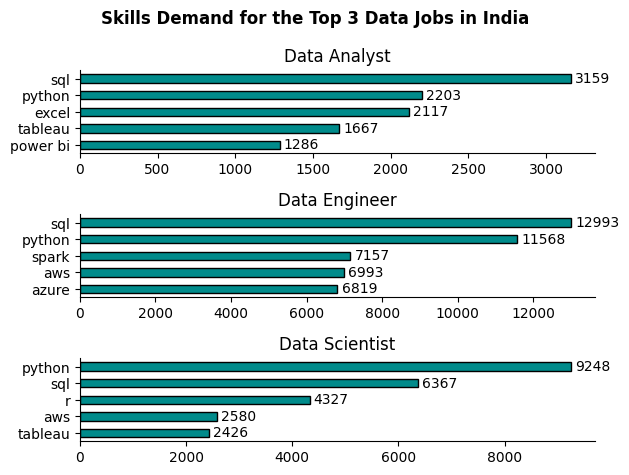

In [62]:
fig , ax = plt.subplots(len(job_titles) , 1)

for i, job_title in enumerate(job_titles):
  df_plot = data_skills_count[data_skills_count['job_title_short'] == job_title].head(5).sort_values('skills_count' , ascending= True)
  bars = df_plot.plot(kind= 'barh', x='job_skills' , y= 'skills_count' , title= job_title , ax=ax[i], legend= False , color = 'darkcyan', edgecolor= 'black')
  ax[i].set_title(job_title, fontdict={'fontsize': 12})
  ax[i].bar_label(bars.containers[0], fmt='%d', padding=3, fontsize=10, fontweight='medium')
  ax[i].set_ylabel('')
  for spine in ['top' , 'right']:
    ax[i].spines[spine].set_visible(False)

fig.suptitle(f'Skills Demand for the Top {len(job_titles)} Data Jobs in India' , fontweight= 'bold')
fig.tight_layout()
